### 1. Resolver a classificação do Iris dataset para k=3 e k=5 com essas funções que implementamos no seguinte documento colab. Usando 70% dos dados para treino e 30% para teste. Ou seja: não é para usar a implementação do scikit para o kNN, nem o split_train_test do scikit

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
X, y = datasets.load_iris(return_X_y=True)

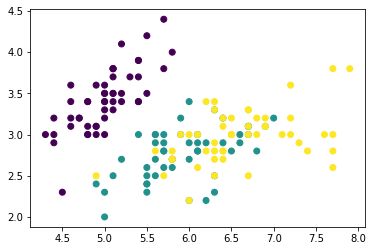

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y);

## Distância euclidiana
A distância euclidiana entre os pontos $ P=(p_{1},p_{2},\dots ,p_{n})$ e $Q=(q_{1},q_{2},\dots ,q_{n})$ em um espaço euclidiano n-dimensional, é definida como:

$$ \sqrt{ (p_{1}-q_{1})^{2} + (p_{2}-q_{2})^{2} + \cdots +(p_{n}-q_{n})^{2} } = \sqrt {\sum _{i=1}^{n}(p_{i}-q_{i})^{2}} $$

In [4]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

## Obtenção dos $k$ vizinhos mais próximos

In [5]:
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

## Classsificação de uma nova linha dado um valor de $k$

In [6]:
def predict_classification(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

In [7]:
idx_sort = get_neighbors(X, y[0], 3)

In [8]:
predict_classification(X, y, y[0], 3)

idx_sort:[41 13  8], output_values:[0 0 0], prediction:0


0

### Split treino e teste

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data[train_indices], data[test_indices]

### separar conjunto de teste em 30% dos dados e treino 70% dos dados.

In [10]:
train_set, test_set = split_train_test(X, 0.3)

print(len(train_set), "train +", len(test_set), "test")

105 train + 45 test


In [11]:
idx_sort = get_neighbors(train_set, test_set[0], 3)
predict_classification(train_set, y, test_set[0], 3)

# testar se não possui erros dos index dos arrays

idx_sort:[64 75 24], output_values:[1 1 0], prediction:1


1

### previsão com k=3 e k=5

In [12]:
def predict_k3():
    print('Para k = 3:')
    for i, x in np.ndenumerate(test_set):
        predict_classification(train_set, y, test_set[i], 3)

def predict_k5():
    print('Para k = 5:')
    for i, x in np.ndenumerate(test_set):
        predict_classification(train_set, y, test_set[i], 5)

In [13]:
predict_k3()
print('\n\n')
predict_k5()
print('\n\n')

Para k = 3:
idx_sort:[ 4 62 59], output_values:[0 1 1], prediction:1
idx_sort:[84 45 34], output_values:[1 0 0], prediction:0
idx_sort:[31 41 59], output_values:[0 0 1], prediction:0
idx_sort:[76 52 51], output_values:[1 1 1], prediction:1
idx_sort:[62 59 85], output_values:[1 1 1], prediction:1
idx_sort:[101  41  97], output_values:[2 0 1], prediction:0
idx_sort:[76 51 52], output_values:[1 1 1], prediction:1
idx_sort:[76 52 51], output_values:[1 1 1], prediction:1
idx_sort:[22  4 62], output_values:[0 0 1], prediction:0
idx_sort:[84 45 34], output_values:[1 0 0], prediction:0
idx_sort:[ 4 22 62], output_values:[0 0 1], prediction:0
idx_sort:[84 45 76], output_values:[1 0 1], prediction:1
idx_sort:[ 4 62 59], output_values:[0 1 1], prediction:1
idx_sort:[ 84 101  45], output_values:[1 2 0], prediction:0
idx_sort:[41 31 59], output_values:[0 0 1], prediction:0
idx_sort:[76 51 52], output_values:[1 1 1], prediction:1
idx_sort:[ 4 22 62], output_values:[0 0 1], prediction:0
idx_sort:[84 

### 2. O conjunto de dados de qualidade de vinho
 consiste na predição da qualidade de vinhos brancos sobre uma escala 
dada medições químicas de cada vinho. Baixe o conjunto de qualidade de 
vinho e faça o seguinte com ele em um Jupyter Notebook:

In [14]:
import pandas as pd
df = pd.read_csv('winequality/winequality-white.csv', delimiter=';')

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2.1. Exiba a quantidade de amostras existente em cada classe de  vinho, onde as classes são representadas por valores inteiros entre 0 e  10.

In [16]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### 2.2. Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality'],axis=1) 
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.3. Crie diferentes modelos de classificação de vinho usando o kNN com diferentes valores de k.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test)

#print(confusion_matrix(y_test,pred))
k3 = classification_report(y_test,pred)

para k = 3

In [19]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test)

confusion_matrix(y_test,pred)
k5= classification_report(y_test,pred)

para k = 5

In [20]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test)

confusion_matrix(y_test,pred)
k7=classification_report(y_test,pred)

para k = 7

In [21]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test)

confusion_matrix(y_test,pred)
k9=classification_report(y_test,pred)

para k = 9

In [22]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train,y_train)
pred = neigh.predict(X_test)

confusion_matrix(y_test,pred)
k8=classification_report(y_test,pred)

para k = 8

### 2.4. Mostre os resultados de acurácia para os modelos criados. Qual o modelo com melhor acurácia?

In [23]:
print('para k = 3\n')
print(k3)
print('para k = 5\n')
print(k5)
print('para k = 7\n')
print(k7)
print('para k = 9\n')
print(k9)
print('para k = 8\n')
print(k8)

para k = 3

              precision    recall  f1-score   support

           3       0.12      0.14      0.13         7
           4       0.12      0.17      0.14        40
           5       0.45      0.51      0.48       426
           6       0.54      0.56      0.55       668
           7       0.48      0.34      0.40       280
           8       0.38      0.16      0.23        49

    accuracy                           0.48      1470
   macro avg       0.35      0.32      0.32      1470
weighted avg       0.48      0.48      0.48      1470

para k = 5

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.27      0.20      0.23        40
           5       0.44      0.50      0.47       426
           6       0.52      0.59      0.55       668
           7       0.41      0.29      0.34       280
           8       0.45      0.10      0.17        49

    accuracy                           0.48      1470

## Como podemos ver, a melhor acurácia ocorreu com k=3 e k=5 ambos com 48% de acurácia